In [9]:
import serial
import time
import csv

# Replace with your Arduino's port (e.g. 'COM3', '/dev/ttyACM0', etc.)
ser = serial.Serial('COM10', 9600, timeout=1)

# Allow time for Arduino reset
time.sleep(2)
time_list = []
values = []
# Open a CSV file for writing
with open("distance_data.csv", mode="w", newline="") as f:
    writer = csv.writer(f)
    # Write a header row
    writer.writerow(["Time (s)", "Distance (cm)"])

    print("Logging distance for 10 seconds...")
    start_time = time.time()
    log_duration = 10  # seconds

    while True:
        current_time = time.time() - start_time
        if current_time > log_duration:
            break
        
        if ser.in_waiting > 0:
            line = ser.readline().decode('utf-8').strip()
            
            # Expecting just a numeric value from Arduino
            # If you see "Distance: 1196.93 cm", parse out the number
            dist_value = float(line)
            time_list.append(current_time)
            time_list.append(current_time+0.01)
            values.append(2000-dist_value)
            values.append(0)
            # Write the data (time + distance) to CSV
            writer.writerow([round(current_time, 2), 2000-dist_value])
            print(f"Time: {round(current_time, 2)}s | Distance: {dist_value} cm")

print("Done logging. CSV file saved as distance_data.csv")
ser.close()
print(time_list)
print(values)


Logging distance for 10 seconds...
Time: 0.0s | Distance: 1196.88 cm
Time: 0.05s | Distance: 1197.0 cm
Time: 1.12s | Distance: 1196.8 cm
Time: 2.2s | Distance: 1196.74 cm
Time: 3.2s | Distance: 7.2 cm
Time: 4.2s | Distance: 7.08 cm
Time: 5.27s | Distance: 1196.78 cm
Time: 6.34s | Distance: 1196.68 cm
Time: 7.42s | Distance: 1197.0 cm
Time: 8.49s | Distance: 1197.09 cm
Time: 9.56s | Distance: 1196.98 cm
Done logging. CSV file saved as distance_data.csv
[0.0, 0.01, 0.05047106742858887, 0.06047106742858887, 1.1231882572174072, 1.1331882572174072, 2.195394992828369, 2.205394992828369, 3.1979475021362305, 3.2079475021362303, 4.199852228164673, 4.209852228164673, 5.272650957107544, 5.282650957107544, 6.344669580459595, 6.3546695804595945, 7.417159080505371, 7.427159080505371, 8.488821029663086, 8.498821029663086, 9.561048984527588, 9.571048984527588]
[803.1199999999999, 0, 803.0, 0, 803.2, 0, 803.26, 0, 1992.8, 0, 1992.92, 0, 803.22, 0, 803.3199999999999, 0, 803.0, 0, 802.9100000000001, 0, 8

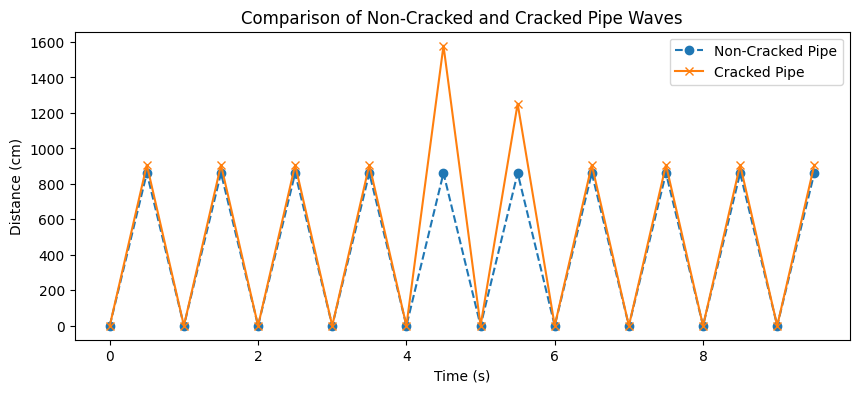

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def generate_wave(time_steps, amplitude_range=(750, 1000), cracked=False):
    """Generate sawtooth wave with even indices at 0 and odd indices with amplitude values."""
    wave = np.zeros_like(time_steps)
    odd_indices = np.arange(1, len(time_steps), 2)
    num = np.random.randint(*amplitude_range)
    wave[odd_indices] = num

    if cracked:
        # Choose a starting point for a consecutive spike region
        num_spikes = len(odd_indices) // 4  # Number of consecutive spikes
        start_idx = np.random.choice(odd_indices[:-num_spikes], size=1)[0]  # Ensure space for consecutive points
        spike_indices = np.arange(start_idx, start_idx + num_spikes * 2, 2)  # Ensure they are consecutive odd indices
        
        # Apply spike values
        wave[spike_indices] = np.random.randint(800, 2000, size=len(spike_indices))
    
    return wave


# Generate time steps (0 to 10 with step 0.5 to create even/odd indices)
time_steps = np.arange(0, 10, 0.5)

# Generate waves
non_cracked_wave = generate_wave(time_steps, amplitude_range=(750, 1000), cracked=False)
cracked_wave = generate_wave(time_steps, amplitude_range=(750, 1000), cracked=True)

# Plot both waves
plt.figure(figsize=(10, 4))
plt.plot(time_steps, non_cracked_wave, label="Non-Cracked Pipe", linestyle="--", marker="o")
plt.plot(time_steps, cracked_wave, label="Cracked Pipe", linestyle="-", marker="x")
plt.xlabel("Time (s)")
plt.ylabel("Distance (cm)")
plt.legend()
plt.title("Comparison of Non-Cracked and Cracked Pipe Waves")
plt.show()






[750.         755.01002004 760.02004008 765.03006012 770.04008016
 775.0501002  780.06012024 785.07014028 790.08016032 795.09018036
 800.1002004  805.11022044 810.12024048 815.13026052 820.14028056
 825.1503006  830.16032064 835.17034068 840.18036072 845.19038076
 850.2004008  855.21042084 860.22044088 865.23046092 870.24048096
 875.250501   880.26052104 885.27054108 890.28056112 895.29058116
 900.3006012  905.31062124 910.32064128 915.33066132 920.34068136
 925.3507014  930.36072144 935.37074148 940.38076152 945.39078156
 950.4008016  955.41082164 960.42084168 965.43086172 970.44088176
 975.4509018  980.46092184 985.47094188 990.48096192 995.49098196
 750.501002   755.51102204 760.52104208 765.53106212 770.54108216
 775.5511022  780.56112224 785.57114228 790.58116232 795.59118236
 800.6012024  805.61122244 810.62124248 815.63126253 820.64128257
 825.65130261 830.66132265 835.67134269 840.68136273 845.69138277
 850.70140281 855.71142285 860.72144289 865.73146293 870.74148297
 875.75150

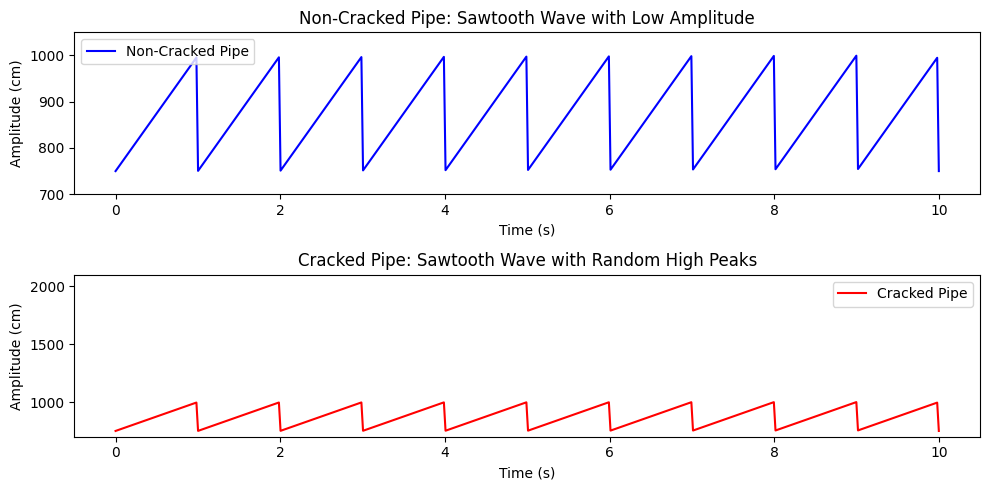

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate time values
time = np.linspace(0, 10, 500)

# Non-Cracked Pipe: Sawtooth wave with amplitude between 750 to 1000
non_cracked_wave = 750 + 250 * (time % 1)  # Sawtooth pattern

# Cracked Pipe: Sawtooth wave with 3-5 random high peaks up to 2000
num_peaks = random.randint(3, 5)
cracked_wave = np.copy(non_cracked_wave)

print(cracked_wave)

# Plot the waveforms
plt.figure(figsize=(10, 5))

# Non-cracked pipe
plt.subplot(2, 1, 1)
plt.plot(time, non_cracked_wave, label="Non-Cracked Pipe", color="blue")
plt.title("Non-Cracked Pipe: Sawtooth Wave with Low Amplitude")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (cm)")
plt.ylim(700, 1050)
plt.legend()

# Cracked pipe
plt.subplot(2, 1, 2)
plt.plot(time, cracked_wave, label="Cracked Pipe", color="red")
plt.title("Cracked Pipe: Sawtooth Wave with Random High Peaks")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (cm)")
plt.ylim(700, 2100)
plt.legend()

plt.tight_layout()
plt.show()


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.signal import welch
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

np.random.seed(42)

def crack_growth_with_factors(t, a, C0=1e-10, m=3.0, sigma=200, T=298, H2S=0, C_threshold=1e-4, alpha=0.5, beta=2, mu=0.5, pi=np.pi):
    C_T = C0 * np.exp(-mu / (8.314 * T))
    SCC_factor = alpha * (H2S / C_threshold) ** beta
    C_x = np.random.normal(1.0, 0.1)
    return C_T * (sigma * np.sqrt(pi * a)) ** m * (1 + SCC_factor) * C_x

def simulate_crack_growth(a0=0.005, time_span=(0, 1000), time_eval=np.linspace(0, 1000, 500)):
    sol = solve_ivp(crack_growth_with_factors, time_span, [a0], t_eval=time_eval, method='RK45')
    t_values = sol.t
    crack_sizes = sol.y[0]
    growth_rates = np.zeros_like(crack_sizes)
    growth_rates[1:] = crack_sizes[1:] - crack_sizes[:-1]
    growth_rates[0] = growth_rates[1]
    return t_values, crack_sizes, growth_rates

def generate_burst_noise(N, probability=0.1, strength=10):
    noise = np.random.normal(0, 1, N)
    bursts = np.random.rand(N) < probability
    noise[bursts] += np.random.normal(0, strength, np.sum(bursts))
    return noise

def generate_fem_data(samples=50):
    crack_sizes = np.linspace(0.001, 0.02, samples)
    fem_wave_responses = np.sin(2 * np.pi * 50 * crack_sizes)
    return crack_sizes.reshape(-1, 1), fem_wave_responses

fem_inputs, fem_outputs = generate_fem_data()
scaler = StandardScaler()
fem_inputs_scaled = scaler.fit_transform(fem_inputs)
gp_model = MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
gp_model.fit(fem_inputs_scaled, fem_outputs)

def predict_fem(crack_size):
    crack_size_scaled = scaler.transform([[crack_size]])
    return gp_model.predict(crack_size_scaled)[0]

def leakage_pressure_drop(crack_size, P1=1e5, P2=9e4, rho=1000, Cd=0.62, A_ref=1e-4):
    A = A_ref * (crack_size / 0.01)
    velocity = np.sqrt(2 * (P1 - P2) / rho)
    flow_rate = Cd * A * velocity
    delta_P = rho * (velocity ** 2) / 2
    return delta_P, flow_rate

from scipy.signal import welch
import numpy as np

def compute_spectral_entropy(signal):
    """Compute spectral entropy of a signal."""
    freqs, psd = welch(signal, nperseg=len(signal))  # Set nperseg explicitly
    psd_norm = psd / np.sum(psd)  # Normalize power spectral density
    spectral_entropy = -np.sum(psd_norm * np.log2(psd_norm + np.finfo(float).eps))  # Avoid log(0)
    return spectral_entropy


time_values, crack_sizes, growth_rates = simulate_crack_growth()

import numpy as np

def generate_wave(time_steps, amplitude_range=(750, 1000), cracked=False):
    """Generate sawtooth wave with even indices at 0 and odd indices with amplitude values."""
    wave = np.zeros_like(time_steps)
    odd_indices = np.arange(1, len(time_steps), 2)
    num = np.random.randint(*amplitude_range)
    wave[odd_indices] = num

    if cracked:
        num_spikes = len(odd_indices) // 4  # Number of consecutive spikes
        start_idx = np.random.choice(odd_indices[:-num_spikes], size=1)[0]  
        spike_indices = np.arange(start_idx, start_idx + num_spikes * 2, 2)  
        wave[spike_indices] = np.random.randint(800, 2000, size=len(spike_indices))
    
    return wave


def generate_cracked_synthetic_data(N=500):
    data = []
    n_samples = len(crack_sizes)
    time_steps = np.arange(0, 10, 0.5)  # Define time steps for wave generation

    for i in range(N):
        idx = i % n_samples
        a = crack_sizes[idx]
        growth_rate = growth_rates[idx]

        if i >= n_samples:
            a += np.random.normal(0, 0.0005)
            a = max(0.001, a)

        fem_approx = predict_fem(a)
        burst_noise = generate_burst_noise(len(time_steps))
        
        # Generate sawtooth-like wave
        wave_signal = generate_wave(time_steps, amplitude_range=(750, 1000), cracked=True)
        
        delta_P, flow_rate = leakage_pressure_drop(a)
        entropy = compute_spectral_entropy(wave_signal)
        amplitude = np.max(np.abs(wave_signal)) * 100
        duration = max(0.5, min(5, a * 1000))
        rise_time = duration / 10
        counts = max(5, min(50, int(flow_rate * 1e6)))
        energy = 0.5 * amplitude * amplitude * duration
        peak_frequency = max(10, min(100, 50 + a * 1000))
        rms_voltage = amplitude / 10
        material_factor = np.random.normal(1.0, 0.1)
        crack_direction_factor = np.cos(np.random.uniform(0, np.pi))
        signal_attenuation = max(0.1, min(5, a * 100 * material_factor * crack_direction_factor))
        cracked = 1
        data.append([a, fem_approx, amplitude, duration, rise_time, counts, energy, peak_frequency, rms_voltage, signal_attenuation, delta_P, flow_rate, entropy, growth_rate, cracked])
    
    return np.array(data)

import numpy as np

def generate_non_cracked_data(N=500):
    data = []
    n_samples = 10  
    baseline_crack_size = 0.0005  
    time_steps = np.arange(0, 10, 0.5)  # Define time steps for wave generation

    for i in range(N):
        a = baseline_crack_size + np.random.normal(0, 0.0001)  
        growth_rate = 0  

        fem_approx = predict_fem(a)  # FEM approximation for a healthy pipe
        
        # Generate sawtooth-like wave for a non-cracked pipe
        wave_signal = generate_wave(time_steps, amplitude_range=(750, 1000), cracked=False)
        
        delta_P, flow_rate = 0, 0  # No leakage in a non-cracked pipe
        entropy = compute_spectral_entropy(wave_signal)
        amplitude = np.max(np.abs(wave_signal)) * 50  
        duration = 1  
        rise_time = duration / 10
        counts = 5  
        energy = 0.5 * amplitude * amplitude * duration * 0.1  
        peak_frequency = 50  
        rms_voltage = amplitude / 10
        material_factor = np.random.normal(1.0, 0.05)
        crack_direction_factor = 1  
        signal_attenuation = 1
        cracked = 0  

        data.append([a, fem_approx, amplitude, duration, rise_time, counts, energy, peak_frequency,
                     rms_voltage, signal_attenuation, delta_P, flow_rate, entropy, growth_rate, cracked])

    return np.array(data)
data_cracked = generate_cracked_synthetic_data()
data_non_cracked = generate_non_cracked_data()

# Convert to DataFrames
columns = ["CrackSize", "FEM_Approx", "Amplitude (dB)", "Duration (ms)", "Rise Time (ms)", "Counts", 
           "Energy (a.u.)", "Peak Frequency (kHz)", "RMS Voltage (V)", "Signal Attenuation (dB/m)", 
           "PressureDrop", "FlowRate", "SpectralEntropy", "GrowthRate", "Cracked"]

df_cracked = pd.DataFrame(data_cracked, columns=columns)
df_non_cracked = pd.DataFrame(data_non_cracked, columns=columns)

# Combine both datasets
dataset = pd.concat([df_cracked, df_non_cracked], ignore_index=True)

# Shuffle the dataset
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
dataset.to_csv("hybrid_synthetic_ultrasonic_data_with_labels.csv", index=False)

print("Dataset saved successfully!")


Dataset saved successfully!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_wave(time_steps, amplitude_range=(750, 1000), cracked=False):
    """Generate sawtooth wave with even indices at 0 and odd indices with amplitude values."""
    wave = np.zeros_like(time_steps)
    odd_indices = np.arange(1, len(time_steps), 2)
    num = np.random.randint(*amplitude_range)
    wave[odd_indices] = num

    if cracked:
        # Choose a starting point for a consecutive spike region
        num_spikes = len(odd_indices) // 4  # Number of consecutive spikes
        start_idx = np.random.choice(odd_indices[:-num_spikes], size=1)[0]  # Ensure space for consecutive points
        spike_indices = np.arange(start_idx, start_idx + num_spikes * 2, 2)  # Ensure they are consecutive odd indices
        
        # Apply spike values
        wave[spike_indices] = np.random.randint(800, 2000, size=len(spike_indices))
    
    return wave


# Generate time steps (0 to 10 with step 0.5 to create even/odd indices)
time_steps = np.arange(0, 10, 0.5)

# Generate waves
non_cracked_wave = generate_wave(time_steps, amplitude_range=(750, 1000), cracked=False)
cracked_wave = generate_wave(time_steps, amplitude_range=(750, 1000), cracked=True)

# Plot both waves
plt.figure(figsize=(10, 4))
plt.plot(time_steps, non_cracked_wave, label="Non-Cracked Pipe", linestyle="--", marker="o")
plt.plot(time_steps, cracked_wave, label="Cracked Pipe", linestyle="-", marker="x")
plt.xlabel("Time (s)")
plt.ylabel("Distance (cm)")
plt.legend()
plt.title("Comparison of Non-Cracked and Cracked Pipe Waves")
plt.show()


In [2]:
import numpy as np
import numpy as np

data_dict = {
    "CrackSize": np.random.uniform(0.1, 5.0),  # Crack size in mm
    "FEM_Approx": np.random.uniform(0.01, 0.5),  # Finite Element Method approximation
    "Amplitude (dB)": np.random.uniform(20, 80),  # Signal amplitude in decibels
    "Duration (ms)": np.random.uniform(0.5, 5.0),  # Signal duration in milliseconds
    "Rise Time (ms)": np.random.uniform(0.1, 2.0),  # Rise time in milliseconds
    "Counts": np.random.randint(5, 50),  # Number of signal counts
    "Energy (a.u.)": np.random.uniform(100, 5000),  # Energy in arbitrary units
    "Peak Frequency (kHz)": np.random.uniform(50, 500),  # Frequency in kHz
    "RMS Voltage (V)": np.random.uniform(0.1, 5.0),  # RMS voltage in Volts
    "Signal Attenuation (dB/m)": np.random.uniform(0.1, 2.0),  # Attenuation in dB per meter
    "PressureDrop": np.random.uniform(0.1, 5.0),  # Pressure drop in Pascals
    "FlowRate": np.random.uniform(0.01, 0.5),  # Flow rate in cubic meters per second
    "SpectralEntropy": np.random.uniform(0.5, 1.5),  # Spectral entropy
    "GrowthRate": np.random.uniform(0.01, 0.5)  # Crack growth rate
}

# Print generated values
print(data_dict)


# Convert to NumPy array
new_data = np.array([list(data_dict.values())])

# Print to verify
print(new_data.shape)


{'CrackSize': 2.7356638767733426, 'FEM_Approx': 0.2216715738242476, 'Amplitude (dB)': 24.65635630527853, 'Duration (ms)': 3.7516280508756545, 'Rise Time (ms)': 1.0342323550900572, 'Counts': 16, 'Energy (a.u.)': 831.4803332516711, 'Peak Frequency (kHz)': 294.67420361243944, 'RMS Voltage (V)': 4.113250900146681, 'Signal Attenuation (dB/m)': 1.001868874179627, 'PressureDrop': 3.8124675154315097, 'FlowRate': 0.08090370872888084, 'SpectralEntropy': 1.193316168040765, 'GrowthRate': 0.40754234270906553}
(1, 14)


In [3]:
# Load the trained model and scaler
import joblib

xgb_model = joblib.load("xgboost_model.pkl")
scaler = joblib.load("scaler.pkl")

print(new_data.shape)

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Predict
prediction = xgb_model.predict(new_data_scaled)

# Output the prediction
print("Predicted Class:", prediction[0])  # 0 = Not Cracked, 1 = Cracked


(1, 14)
Predicted Class: 0


c:\Users\smadh\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import joblib
model = joblib.load("random_forest_model.pkl")
model.predict()

In [1]:
crack = 1.0
print(int(crack))

1
